<a href="https://colab.research.google.com/github/ronaldbeja/Artificial-intelligence/blob/main/energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INFORMACION GENERAL
Para el proyecto asignado se trabajará con el dataset llamado "Energy Efficiency", el cual busca estimar las cargas de calentamiento y de enfriamiento (es decir, la cantidad de energía que se necesita añadir o remover respectivamente, para poder mantener la temperatura en un rango aceptable) en edificios a partir de sus parametros de construcción.


##Salidas:
* y1: heating load (cargas de calentamiento) 
*y2: Cooling load (carga de enfriamiento) 

## Entradas:
* X1: Relative Compactness (compacidad relativa)
* X2: Surface Area (área superficial)
* X3 Wall Area (área de muro)
* X4 Roof Area (área de techo)
* X5 Overall Height (altura total)
* X6 Orientation (orientación)
* X7 Glazing Area (área de acristalamiento)
* X8 Glazing Area Distribution (distribución del área de acristalamiento)






#PREPROCESAMIENTO DEL DATASET

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn import linear_model
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')
features=['R.Compactness','SurfaceArea','WallArea','RoofArea','Height','Orientation','GlazingArea','G.AreaDistribution','HeatingLoad','CoolingLoad']
data.columns=features
data.head()

,R.Compactness,SurfaceArea,WallArea,RoofArea,Height,Orientation,GlazingArea,G.AreaDistribution,HeatingLoad,CoolingLoad
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
#analizamos la informacion de los datos 
data.describe()

,R.Compactness,SurfaceArea,WallArea,RoofArea,Height,Orientation,GlazingArea,G.AreaDistribution,HeatingLoad,CoolingLoad
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [ ]:
#verificamos el tipo de de cada uno de los datos
print(data.dtypes,"\n---------\n")

#verificamos el nuevo tamaño de nuestra tabla y la cantidad de datos 
print(data.shape)

R.Compactness         float64
SurfaceArea           float64
WallArea              float64
RoofArea              float64
Height                float64
Orientation             int64
GlazingArea           float64
G.AreaDistribution      int64
HeatingLoad           float64
CoolingLoad           float64
dtype: object 
---------

(768, 10)


In [ ]:
#verificamos si hay filas duplicadas 
duplicate_rows_df = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 10)


In [ ]:
#Verificamos si hay datos faltantes
data.count()      # Se usa para contar el número de filas

R.Compactness         768
SurfaceArea           768
WallArea              768
RoofArea              768
Height                768
Orientation           768
GlazingArea           768
G.AreaDistribution    768
HeatingLoad           768
CoolingLoad           768
dtype: int64

In [ ]:
#verificamos que no existan datos nulos 
data.isnull().values.any()

False

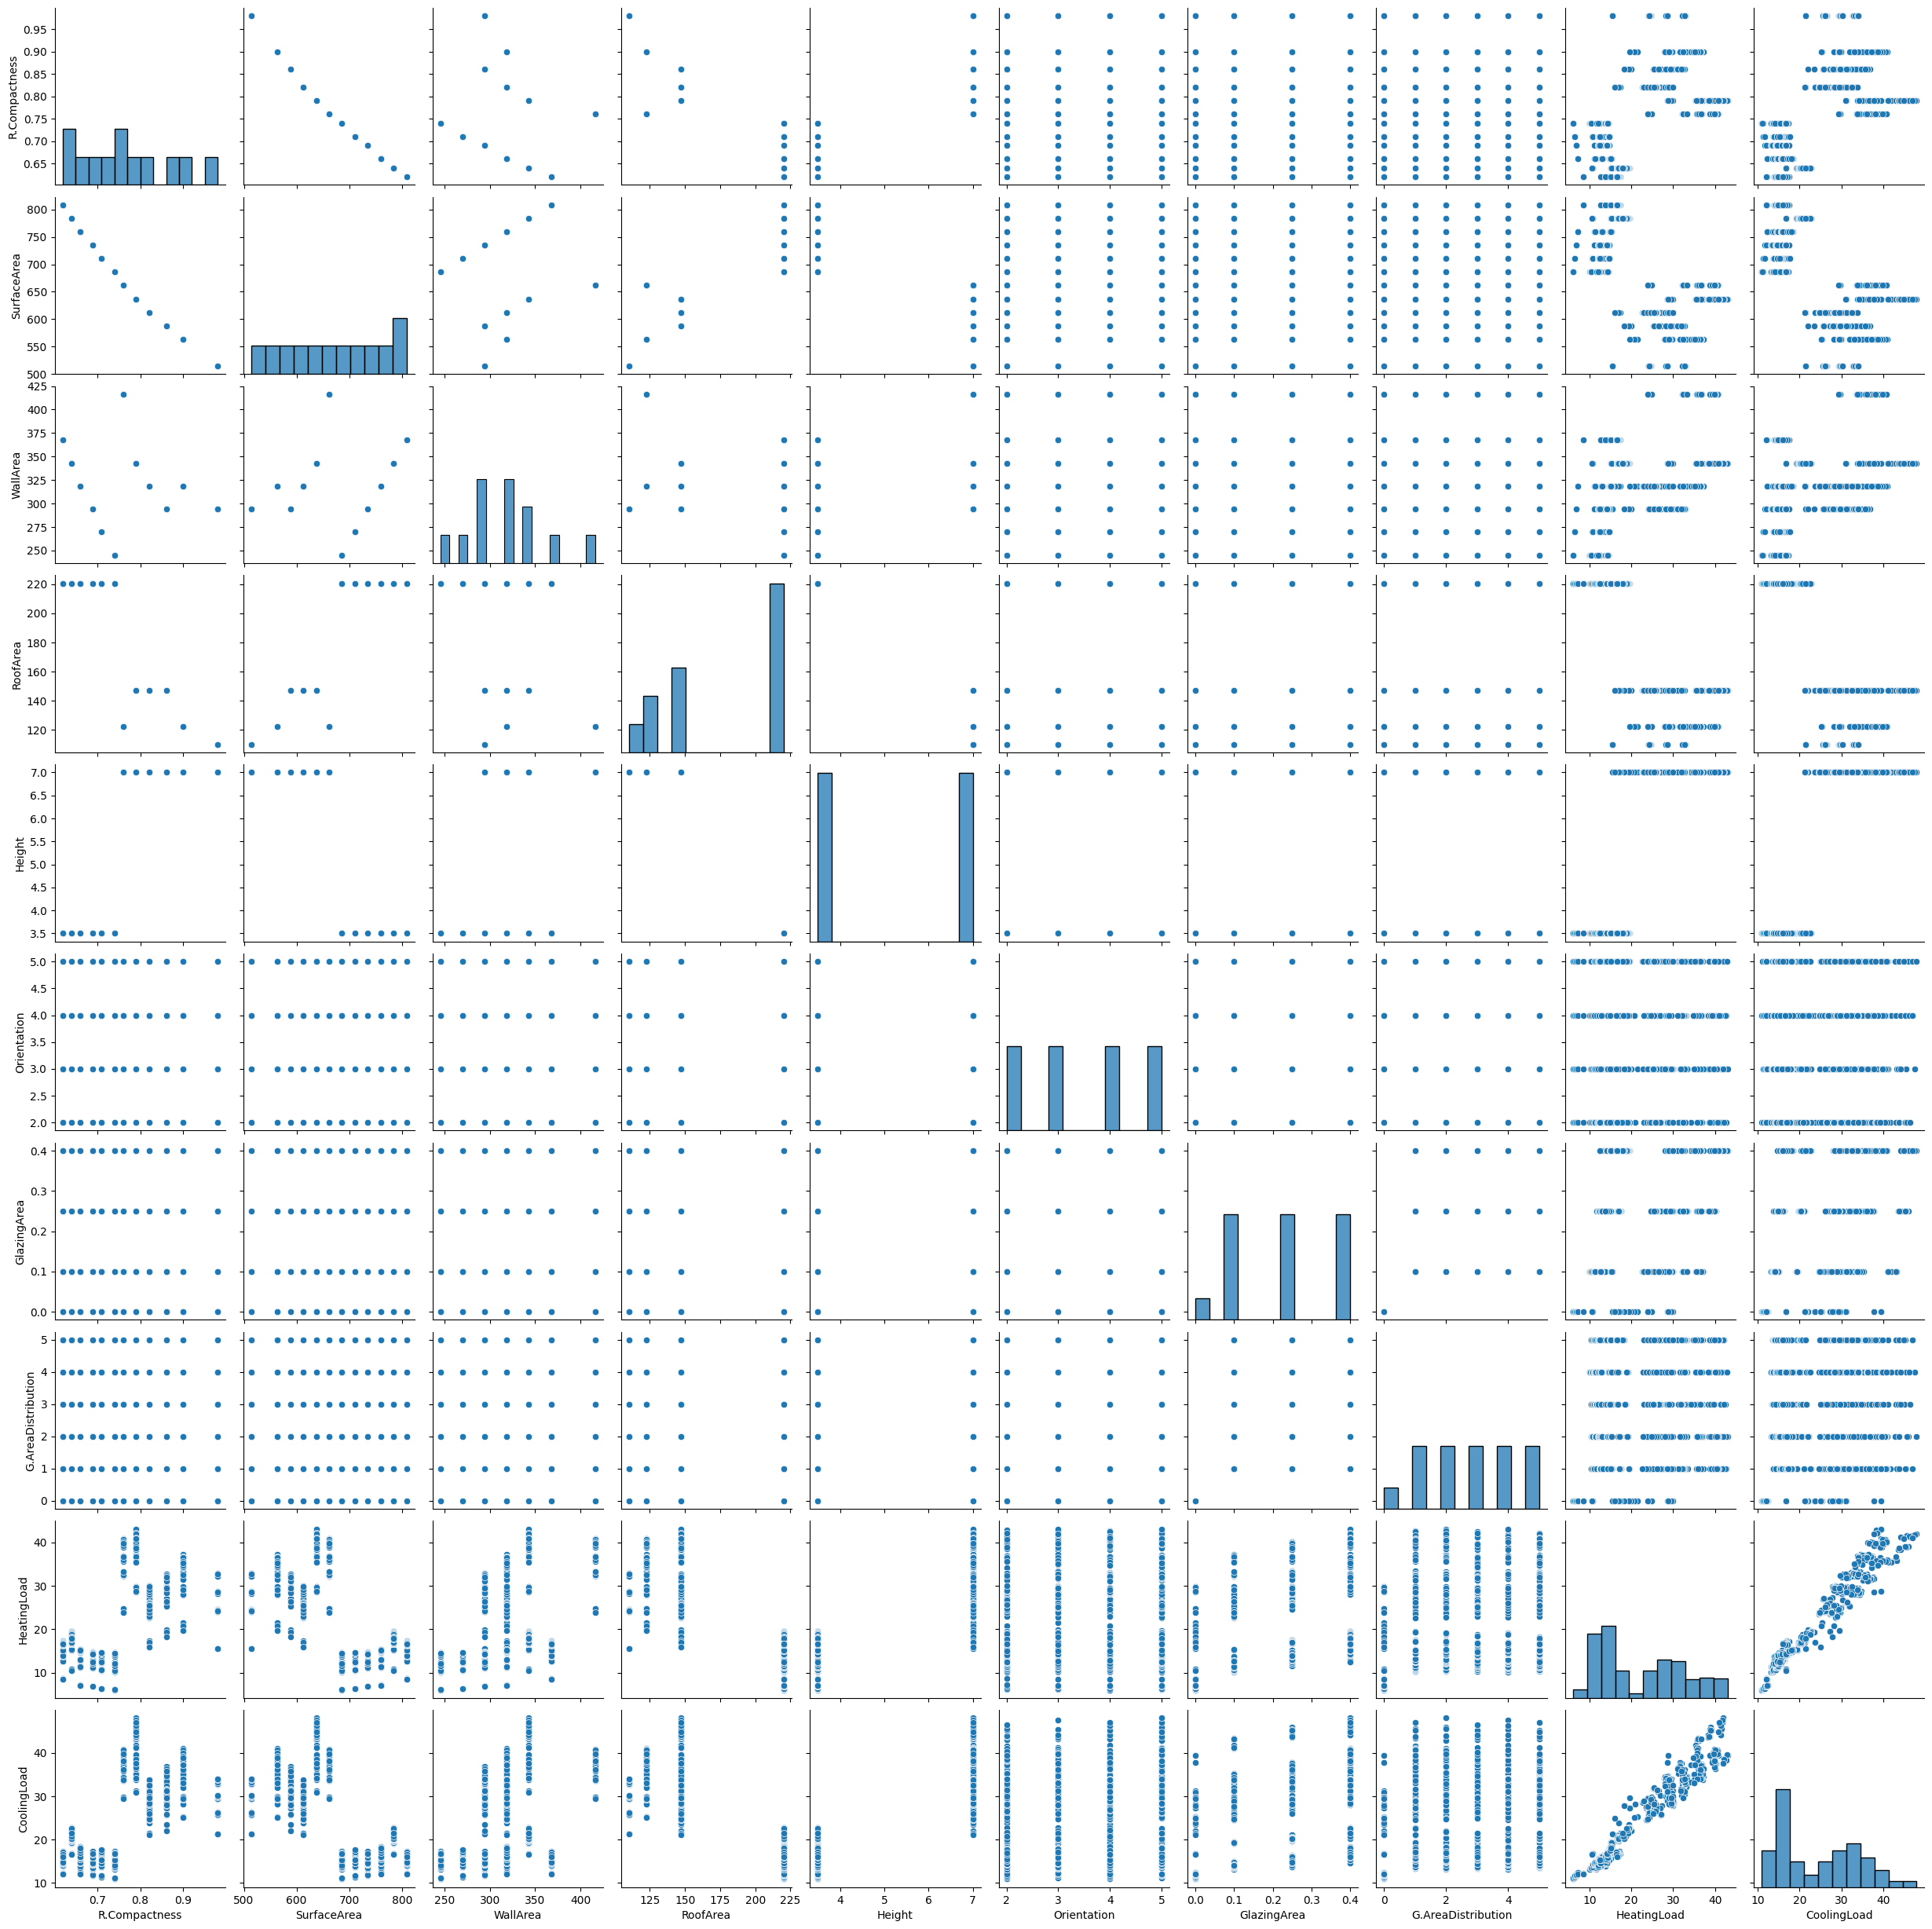

In [ ]:
sns.pairplot(data)

<Axes: >

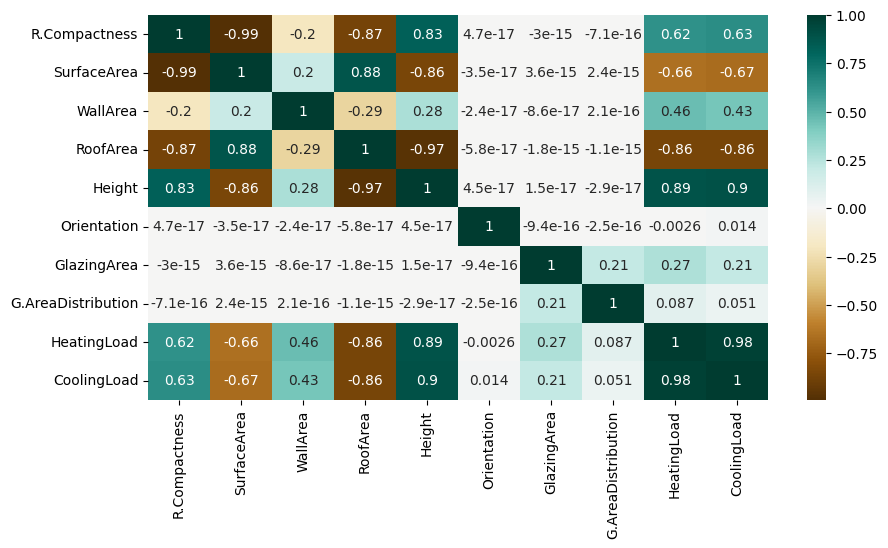

In [ ]:
plt.figure(figsize=(10,5))
c = data.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

<Axes: title={'center': 'RoofArea'}, xlabel='RoofArea'>

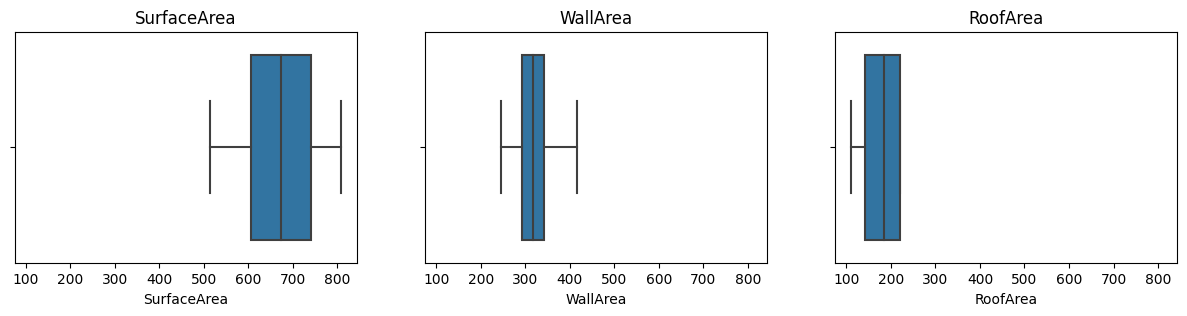

In [ ]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15, 3))
axes[0].set_title("SurfaceArea")
axes[1].set_title("WallArea")
axes[2].set_title("RoofArea")
sns.boxplot(x=data['SurfaceArea'], ax=axes[0])
sns.boxplot(x=data['WallArea'], ax=axes[1])
sns.boxplot(x=data['RoofArea'], ax=axes[2])

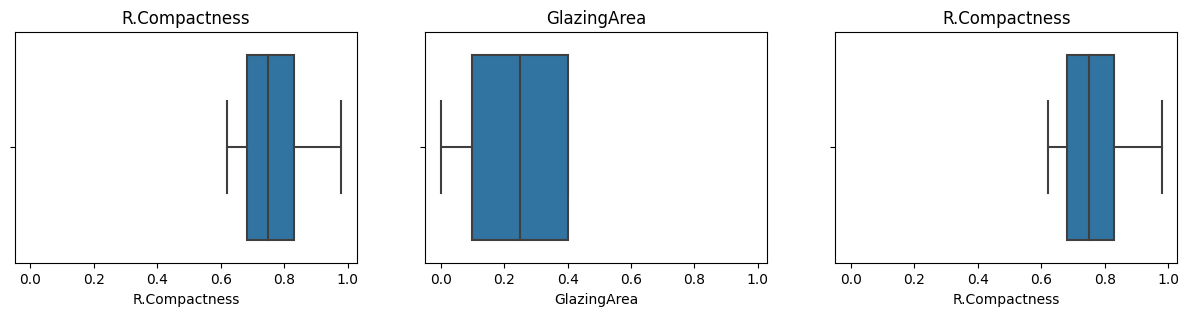

In [ ]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15, 3))
sns.boxplot(x=data['R.Compactness'], ax=axes[0])
sns.boxplot(x=data['GlazingArea'], ax=axes[1])
sns.boxplot(x=data['R.Compactness'], ax=axes[2])
axes[0].set_title("R.Compactness")
axes[1].set_title("GlazingArea")
axes[2].set_title("R.Compactness")


plt.show()



<Axes: xlabel='Height'>

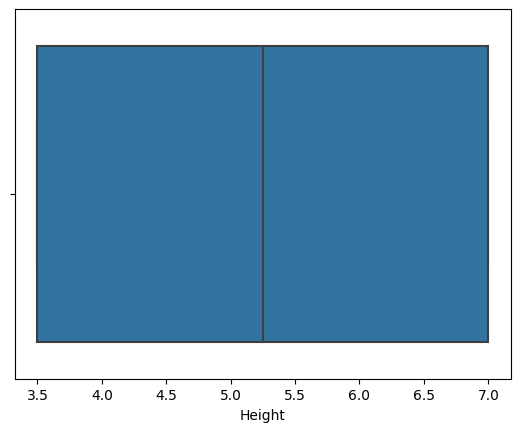

In [ ]:
sns.boxplot(x=data['Height'])

<Axes: xlabel='HeatingLoad'>

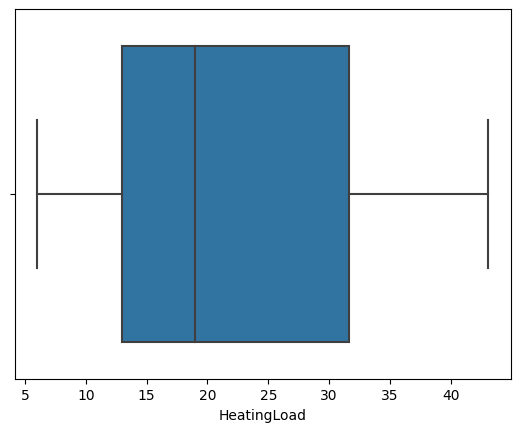

In [ ]:
sns.boxplot(x=data['HeatingLoad'])

**Podemos observar como los datos de "GlazingArea" y "G.AreaDistribution" tienen muy  poca correlacion con nuestra salida "HeatingLoad"**

In [ ]:
#eliminamos los datos con menor correlacion con la salida
data=data.drop(['Orientation','G.AreaDistribution'],axis=1)
x = data.iloc[:,:-2].values


In [ ]:
#se escoge Heating load como salida debido a su mejor correlacion con algunos atributos
y=data.iloc[:,6]

##Normalización y separación de los datos en set de entrenamiento y testeo

In [ ]:
# se realiza la normalizacion
xnorm=preprocessing.normalize(x, norm='l2')
#se divide los datos para entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(xnorm, y, test_size=0.2, random_state=42)

[normalizacion](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html)

#ECUACIÓN NORMAL

In [ ]:
class Ecuacion_normal():
  def __init__(self):
    
    self.Theta=None

  def fit(self,X,y):
      X = np.hstack((np.ones((X.shape[0], 1)), X))#agregar columna de 1 a primer termino
      self.Theta=(np.linalg.inv(X.T.dot(X))).dot(X.T.dot(y))
      print(self.Theta)

  def predict(self,X):
      X = np.hstack((np.ones((X.shape[0], 1)), X))
      y_hat=X.dot(self.Theta)
      return y_hat

  def error(self,y_test,y_hat):
    from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
    RMSE=np.sqrt(mean_squared_error(y_test, y_hat))
    R2= r2_score(y_test, y_hat)
    MSE = mean_squared_error(y_test, y_hat)

    print(f'MSE: {MSE}')
    print(f'R2: {R2}')
    print(f'RMSE: {RMSE}')


In [ ]:
regressor=Ecuacion_normal()
regressor.fit(X_train,y_train)

[   356.56538097 -27879.00590306   -492.             52.
    264.           4341.16304654  15892.91635557]


In [ ]:
y_hat=regressor.predict(X_test)
regressor.error(y_test,y_hat)

MSE: 61.053291885211046
R2: 0.41425807667816217
RMSE: 7.813660594446821


#SCIKIT LEARN

##Ridge

In [ ]:
ridge= linear_model.Ridge(alpha=.1)
#------------------------------------

ridge.fit(X_train,y_train)
pesos=ridge.coef_
bias=ridge.intercept_
print(bias,pesos)

21.81327682501643 [  1.31724256 -27.30698716  89.36828545 -58.33763631  23.03589459
   3.38332245]


In [ ]:
yridge_hat=ridge.predict(X_test)
#----------------------------------

print(f'MSE con ridge: {mean_squared_error(y_test, yridge_hat)}')
print(f'RMSE con ridge: {np.sqrt(mean_squared_error(y_test, yridge_hat))}')
print(f'R2 con ridge: {ridge.score(X_test,y_test)}')  #revisar


MSE con ridge: 24.2916309285188
RMSE con ridge: 4.928654068660003
R2 con ridge: 0.7669474293466976


##Lasso

In [ ]:
lasso = linear_model.Lasso(alpha=0.1)
#--------------------------------------

lasso.fit(X_train,y_train)
pesos=lasso.coef_
bias=lasso.intercept_
print(bias,pesos)

-25.849317749770442 [  0.          -0.         114.66535542  -0.           0.
   0.        ]


In [ ]:
lassoy_hat=ridge.predict(X_test)
#--------------------------------------

print(f'MSE con lasso: {mean_squared_error(y_test, lassoy_hat)}')
print(f'RMSE con lasso: {np.sqrt(mean_squared_error(y_test, lassoy_hat))}')
print(f'R2 con lasso: {lasso.score(X_test,y_test)}')  #revisar


MSE con lasso: 24.2916309285188
RMSE con lasso: 4.928654068660003
R2 con lasso: 0.7436112658087981


#GRADIENTE DESCENDENTE

In [ ]:
class LinearRegression:

    def __init__(self, learning_rate=0.1, n_iters=10000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        self.n_samples, self.n_features = X.shape

        # init parameters
        self.weights = np.zeros(self.n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X[:,0], self.weights[0]) + np.dot(X[:,1], self.weights[1]) + + np.dot(X[:,2], self.weights[2]) + np.dot(X[:,3], self.weights[3]) + + np.dot(X[:,4], self.weights[4])+ np.dot(X[:,5], self.weights[5]) +self.bias
            # compute gradients
            dw0 = (1 / self.n_samples) * 2*np.dot(X[:,0].T, (y_predicted - y))
            dw1 = (1 / self.n_samples) * 2*np.dot(X[:,1].T, (y_predicted - y))
            dw2 = (1 / self.n_samples) * 2*np.dot(X[:,2].T, (y_predicted - y))
            dw3 = (1 / self.n_samples) * 2*np.dot(X[:,3].T, (y_predicted - y))
            dw4 = (1 / self.n_samples) * 2*np.dot(X[:,4].T, (y_predicted - y))
            dw5 = (1 / self.n_samples) * 2*np.dot(X[:,5].T, (y_predicted - y))

            db = (1 / self.n_samples) * 2*np.sum(y_predicted - y)

            # update parameters
            self.weights[0] -= self.lr * dw0
            self.weights[1] -= self.lr * dw1
            self.weights[2] -= self.lr * dw2
            self.weights[3] -= self.lr * dw3
            self.weights[4] -= self.lr * dw4
            self.weights[5] -= self.lr * dw5

            self.bias -= self.lr * db

        return(self.bias,self.weights)
    def predict(self, X):
        y_approximated = np.dot(X[:,0], self.weights[0]) + np.dot(X[:,1], self.weights[1]) + + np.dot(X[:,2], self.weights[2]) + np.dot(X[:,3], self.weights[3]) + + np.dot(X[:,4], self.weights[4])+ np.dot(X[:,5], self.weights[5]) +self.bias
        return y_approximated

    def error(self,y_test,y_hat):
      from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
      RMSE=np.sqrt(mean_squared_error(y_test, y_hat))
      R2= r2_score(y_test, y_hat)
      MSE = mean_squared_error(y_test, y_hat)

      print(f'MSE: {MSE}')
      print(f'R2: {R2}')
      print(f'RMSE: {RMSE}')

In [ ]:
gradiente=LinearRegression()
#--------------------------------------

b,w=gradiente.fit(X_train,y_train)
y_pred=gradiente.predict(X_test)
print(b,w)

11.313556097271164 [  0.61570047 -18.872817    96.73912761 -57.8059723   10.24866045
   1.12766782]


In [ ]:
y_hat

array([11.02662104,  6.88774365, 25.90742158, 28.729338  ,  7.63153554,
       21.00468472, 17.99762617, 21.95251392, 10.32921326, 20.42342181,
       10.32921326, 27.13273568, 20.42342181,  1.27491665, 10.32921326,
       30.14554324, 30.14554324,  4.40721071,  8.27660386, 27.13273568,
       27.75930983, 28.729338  ,  4.09162967, 22.27132219,  4.9338676 ,
       22.27132219, 27.66058063, 27.75930983,  7.63153554,  8.42141709,
        1.27491665,  4.40721071,  7.63153554, 24.38199003, 22.27132219,
       21.95251392, 25.90742158, 22.27132219, 27.66058063,  2.25079719,
       21.95251392,  4.40721071,  0.24220603, 26.39071494,  1.0339915 ,
        0.24220603,  2.22755967,  2.25079719, 22.85197704, 24.04199292,
       27.66058063,  6.88774365,  6.88774365, 25.50032348,  5.26369439,
        4.9338676 ,  4.40721071, 24.38199003, 33.15836217, 30.14554324,
        8.770045  , 11.02662104,  6.88774365, 21.00468472, 21.95251392,
       22.27132219, 22.27132219,  4.09162967,  5.81622225,  4.40

In [ ]:
y_test

array([16.47 , 13.17 , 32.82 , 41.32 , 16.69 , 23.8  , 24.31 , 28.67 ,
       19.52 , 28.07 , 18.46 , 33.08 , 29.79 , 10.37 , 17.69 , 36.95 ,
       36.64 , 12.3  , 14.7  , 32.38 , 28.67 , 41.4  , 11.7  , 36.86 ,
       15.37 , 35.89 , 36.57 , 28.91 , 17.5  , 13.99 , 10.42 , 12.3  ,
       16.93 , 26.84 , 35.94 , 28.18 , 32.72 , 36.9  , 36.06 , 10.7  ,
       28.15 , 12.32 ,  6.366, 31.84 ,  6.79 ,  6.4  ,  7.1  , 10.8  ,
       28.66 , 32.46 , 34.95 , 12.93 , 13.   , 40.12 , 12.27 , 15.32 ,
       12.45 , 24.6  , 40.68 , 35.99 , 14.37 , 16.54 , 13.02 , 22.89 ,
       28.61 , 37.1  , 35.45 , 11.68 , 13.   , 12.03 , 29.14 , 32.84 ,
       12.47 , 24.23 , 31.64 , 12.16 , 29.06 , 24.7  , 32.26 , 19.34 ,
       24.38 , 40.   , 10.68 , 13.91 , 11.6  , 12.43 , 26.46 , 36.13 ,
       37.12 , 17.37 , 15.18 , 25.38 , 11.13 , 12.95 , 36.59 , 12.86 ,
       25.36 , 28.31 , 10.66 , 10.71 , 40.78 , 28.37 , 10.36 , 29.83 ,
       29.43 , 16.76 , 22.58 , 16.44 , 14.08 , 12.41 , 33.12 , 32.31 ,
      

In [ ]:
gradiente.error(y_test,y_hat)

MSE: 61.053291885211046
R2: 0.41425807667816217
RMSE: 7.813660594446821


# Responder las siguientes preguntas:

• ¿Es posible que se presente el fenómeno de sobreajuste (overfitting) en la regresión lineal? ¿Se presento el fenómeno de sobreajuste en el modelo entrenado?

Sí, en caso de que hayan valores atípicos el modelo puede ajustarse a ellos y generalizar mal, o bien si los datos de prueba y de entrenamiento son de diferentes distribuciones.


• ¿El data set seleccionado presenta valores atípicos (outliers)? ¿Cómo se
identificaron los valores atípicos?

NO

• ¿Es necesario eliminar los valores atípicos (outliers)? ¿Por qué sí o por qué no?

No por que no hay 

La eliminación de valores atípicos (outliers) depende del contexto del análisis de datos y del modelo de aprendizaje automático que se está utilizando. En algunos casos, es necesario eliminar los valores atípicos, mientras que en otros, es importante mantenerlos.

Por lo tanto, la eliminación de valores atípicos debe evaluarse cuidadosamente en función del contexto de la aplicación y del modelo de aprendizaje automático que se está utilizando. En algunos casos, se puede justificar la eliminación de valores atípicos, mientras que en otros, es importante mantenerlos y considerar su impacto en el análisis y el modelo. Si se decide eliminar los valores atípicos, es importante documentar y justificar el proceso para que se pueda replicar y validar posteriormente.


• ¿Qué es el escalado (Normalization)? ¿Cuándo es necesario?

El escalado (normalización) es un proceso en el que se ajustan los valores de una variable para que estén dentro de un rango específico o para que tengan una distribución específica. El objetivo del escalado es ayudar a mejorar el rendimiento de los modelos de aprendizaje automático y reducir el impacto de las diferencias en la escala de las características.

El ecalado es necesario cuando se trabaja con conjuntos de datos que contienen características con diferentes escalas y rangos de valores. Cuando las características tienen diferentes escalas, puede ser difícil compararlas y utilizarlas para entrenar modelos de aprendizaje automático. Además, algunas técnicas de aprendizaje automático, como la regresión lineal y las redes neuronales, son sensibles a la escala de las características.


• ¿En qué escenario es preferible utilizar el Descenso del Gradiente en lugar de la Regresión Ordinaria por Mínimos Cuadrados (Ecuación Normal) y por qué?

la Regresión Ordinaria por Mínimos Cuadrados (ecuación normal) es preferible para conjuntos de datos pequeños y modelos simples, mientras que el Descenso del Gradiente es preferible para conjuntos de datos grandes, modelos más complejos y con regularización. La elección entre ambos métodos dependerá de la cantidad de características, la complejidad del modelo, el tamaño del conjunto de datos y los recursos computacionales disponibles.